## Feature Engineering notebook

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import os

In [2]:
project_dir = os.getcwd().split('\\')[:-1]
project_dir = '\\'.join(project_dir)
data_dir = project_dir + '\\data'
video_dir = data_dir+'\\interim\\video'
video_files = [file for file in os.listdir(video_dir)]

In [3]:
file = video_files[50]
data = pd.read_hdf(video_dir + '\\' + file)

### Cleaning of the video window

In [4]:
# Rule 1: proportion of non success is larger than 90%
rule_1 = data.success.sum()/len(data.success)
# Rule 2: mean confidence is larger than 80% 
rule_2 = data.confidence.mean()
# Rule 3: Largest non success sequence is smaller than 2 seconds
sequences = (data.success != 0).cumsum()
zero_sequences  = sequences[data.success==0]
size_of_zero_sequences = zero_sequences.groupby(zero_sequences).count()
size_of_zero_sequences.max()/25

87.36

In [5]:
data

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,pp,started,frames_away_start,t_from_start
0,1,0,0.00,0.73,1,0.514584,0.326337,-0.792911,0.371964,0.284538,...,0.0,0.0,0.0,0.0,0.0,0.0,82,0,-2000,-80.00
1,2,0,0.04,0.98,1,0.381549,0.382794,-0.841362,0.336973,0.317428,...,0.0,0.0,0.0,0.0,1.0,1.0,82,0,-1999,-79.96
2,3,0,0.08,0.98,1,0.348210,0.385931,-0.854287,0.289361,0.310034,...,0.0,0.0,0.0,0.0,1.0,1.0,82,0,-1998,-79.92
3,4,0,0.12,0.98,1,0.375398,0.400965,-0.835645,0.296080,0.290274,...,0.0,0.0,0.0,0.0,0.0,1.0,82,0,-1997,-79.88
4,5,0,0.16,0.98,1,0.368193,0.353579,-0.859893,0.344862,0.266855,...,0.0,0.0,0.0,0.0,0.0,1.0,82,0,-1996,-79.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24370,24371,0,974.80,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,82,1,22370,894.80
24371,24372,0,974.84,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,82,1,22371,894.84
24372,24373,0,974.88,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,82,1,22372,894.88
24373,24374,0,974.92,0.03,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,82,1,22373,894.92


In [6]:
def cleaning_non_success(window):
    cols = [col for col in window.columns][5:-4]
    window.loc[window.confidence < 0.8, cols] = np.nan
    return window

cleaning_non_success(data)

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,pp,started,frames_away_start,t_from_start
0,1,0,0.00,0.73,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82,0,-2000,-80.00
1,2,0,0.04,0.98,1,0.381549,0.382794,-0.841362,0.336973,0.317428,...,0.0,0.0,0.0,0.0,1.0,1.0,82,0,-1999,-79.96
2,3,0,0.08,0.98,1,0.348210,0.385931,-0.854287,0.289361,0.310034,...,0.0,0.0,0.0,0.0,1.0,1.0,82,0,-1998,-79.92
3,4,0,0.12,0.98,1,0.375398,0.400965,-0.835645,0.296080,0.290274,...,0.0,0.0,0.0,0.0,0.0,1.0,82,0,-1997,-79.88
4,5,0,0.16,0.98,1,0.368193,0.353579,-0.859893,0.344862,0.266855,...,0.0,0.0,0.0,0.0,0.0,1.0,82,0,-1996,-79.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24370,24371,0,974.80,0.03,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82,1,22370,894.80
24371,24372,0,974.84,0.03,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82,1,22371,894.84
24372,24373,0,974.88,0.03,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82,1,22372,894.88
24373,24374,0,974.92,0.03,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,82,1,22373,894.92


#### Facial Action Units
Below we compute the mean facial action activity for all FAUs. OpenFace can detect the mean intensity of the following 17 AUs:

1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 20, 23, 25, 26 & 45.

We also compute the standard deviation of the facial action units intensity.

In [7]:
def compute_mean_AUs(video_data):
    processed = {}
    AU_cols = [col for col in video_data.columns if col.startswith('AU') & col.endswith('_r')]
    for AU in AU_cols:
        processed[f'mean_{AU[:-2]}'] = video_data[AU].mean()
    return processed

In [8]:
def compute_std_AUs(video_data):
    processed = {}
    AU_cols = [col for col in video_data.columns if col.startswith('AU') & col.endswith('_r')]
    for AU in AU_cols:
        processed[f'std_{AU[:-2]}'] = video_data[AU].std()
    return processed

In [9]:
def calculate_arousal(video_data):
    processed = {}
    AU_cols = [col for col in video_data.columns if col.startswith('AU') and col.endswith('_r') and '45' not in col]
    df = video_data[AU_cols] - video_data[AU_cols].rolling(60*25, min_periods=1).mean()
    df[df<0] = 0
    processed['mean_Arousal'] = (df.apply(pd.Series.nlargest, axis=1, n=5)).mean(axis=1).mean()
    return processed

In [10]:
def calculate_emotions(video_data):
    """Calculate emotions based on Imotions."""
    processed = {}
    processed['mean_Happy'] = ((video_data['AU06_r'] + video_data['AU12_r'])/2).mean()
    processed['mean_Sad'] = ((video_data['AU01_r'] + video_data['AU04_r'] + video_data['AU15_r'])/3).mean()
    processed['mean_Angry'] = ((video_data['AU04_r'] + video_data['AU05_r'] + video_data['AU07_r'] + video_data['AU23_r'])/4).mean()
    processed['mean_Scared'] = ((video_data['AU01_r'] + video_data['AU02_r'] + video_data['AU04_r'] +video_data['AU05_r'] +
                                 video_data['AU07_r'] + video_data['AU20_r'] + video_data['AU26_r'])/7).mean()
    return processed

calculate_emotions(data)

{'mean_Happy': 0.41798789509078677,
 'mean_Sad': 0.8409769110065008,
 'mean_Angry': 0.4016276059179556,
 'mean_Scared': 0.4495831491978096}

### Eye movement

#### Blink Rate

In [11]:
def compute_blink_rate(video_data):
    blinks = sum(video_data['AU45_c'].diff() == 1)
    seconds = video_data['t_from_start'].values[-1] - video_data['t_from_start'].values[0]
    blinks_sec = blinks/seconds
    blinks_min = blinks_sec*60
    return blinks_min

compute_blink_rate(data)

In [13]:
def compute_blink_rate(video_data):
    peaks = find_peaks(video_data.AU45_r,
                      height=0.5,
                      width=3,
                      distance=5,
                      prominence=0.5)[0]
    blinks = len(peaks)
    seconds = video_data['t_from_start'].values[-1] - video_data['t_from_start'].values[0]
    blinks_sec = blinks/seconds
    blinks_min = blinks_sec*60
    return blinks_min

compute_blink_rate(data)

In [15]:
def compute_percentage_EC(video_data):
    """Compute the amount of percentage of frames where the eyes are closed."""
    per_EC = data['AU45_c'].sum()/data['AU45_c'].count()
    return per_EC

compute_percentage_EC(data)

In [42]:
def compute_gaze(video_data):
    """Compute the average amount of gaze motion during the window"""
    processed = {}
    processed['std_ver_GD'] = video_data['gaze_angle_y'].std()
    processed['std_hor_GD'] = video_data['gaze_angle_x'].std()
    processed['mean_GD'] = (processed['std_hor_GD'] + processed['std_ver_GD'])/ 2
    return processed

compute_gaze(data)

{'std_ver_GD': 0.07826367435576757,
 'std_hor_GD': 0.20883417548627142,
 'mean_GD': 0.1435489249210195}

#### Pupil Dilation

In [17]:
def compute_distance(X_1, X_2, Y_1, Y_2):
    return np.sqrt(((X_1-X_2)**2)+((Y_1-Y_2)**2))

In [18]:
def compute_distance_for_points(points, video_data, video_data_col):
    for point in points:
        video_data_col += compute_distance(video_data[f'eye_lmk_X_{point[0]}'], video_data[f'eye_lmk_X_{point[1]}'],
                                           video_data[f'eye_lmk_Y_{point[0]}'], video_data[f'eye_lmk_Y_{point[1]}'])
    return video_data_col/len(points)

In [19]:
def compute_avg_PD_2_eyes(video_data):

    left_eyes = [(27,23), (26, 22), (25, 21), (24, 20)]
    right_eyes = [(55,51), (54, 50), (53, 49), (52, 48)]
    
    
    video_data['avg_PD_left'] = 0
    video_data['avg_PD_left'] = compute_distance_for_points(left_eyes, video_data, video_data['avg_PD_left'])

    video_data['avg_PD_right'] = 0
    video_data['avg_PD_right'] = compute_distance_for_points(right_eyes, video_data, video_data['avg_PD_right'])
    
                                                                      
    video_data['PD'] = (video_data['avg_PD_left'] + video_data['avg_PD_right']) / 2
    return video_data

In [21]:
def compute_PD_features(video_data):
    processed = {}
    video_data = compute_avg_PD_2_eyes(video_data)
    
    processed['mean_PD'] = video_data['PD'].mean()
    processed['std_PD'] = video_data['PD'].std()
    processed['max_PD'] = video_data['PD'].max()
    
    return processed
compute_PD_features(data)

{'mean_PD': 5.135920590743405,
 'std_PD': 0.40429691075195145,
 'max_PD': 7.10317053697611}

### Facial movement
Mean movement of the head, mean and std of the poses.

In [40]:
def compute_head_motion(video_data):
    processed = {}
    cols = [col for col in video_data.columns if col.startswith('pose')]
    for col in cols:
        processed[f'std_{col}'] = video_data[col].std()
    cols = [col for col in video_data.columns if col.startswith('pose_T')]
    processed['compound_Motion'] = video_data[cols].std().mean()
    return processed

compute_head_motion(df)

{'std_pose_Tx': 6.04301074274851,
 'std_pose_Ty': 2.6861284114547175,
 'std_pose_Tz': 9.109177494415233,
 'std_pose_Rx': 0.031779753327028926,
 'std_pose_Ry': 0.04966664085978171,
 'std_pose_Rz': 0.06359504227100038,
 'compound_Motion': 5.94610554953949}

pose_Tx    16.134817
pose_Ty     8.355281
pose_Tz    11.002509
dtype: float64


<AxesSubplot:>

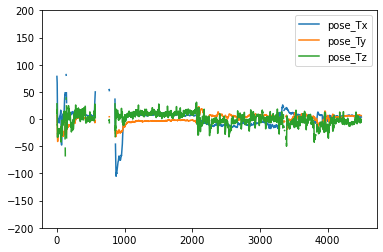

In [23]:
pd.options.mode.chained_assignment = None
df = data[data.timestamp < 180]
df.loc[df.confidence<0.8, :] = np.nan
cols = [col for col in df.columns if col.startswith('pose_T')]
print((df[cols] - df[cols].mean()).std())
(df[cols] - df[cols].mean()).plot.line(ylim=(-200,200))

pose_Tx    9.859760
pose_Ty    5.769974
pose_Tz    9.577546
dtype: float64


<AxesSubplot:>

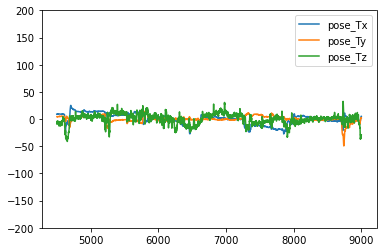

In [24]:
pd.options.mode.chained_assignment = None
df = data[(180 < data.timestamp) & (data.timestamp < 180*2)]
df.loc[df.confidence<0.8, :] = np.nan
cols = [col for col in df.columns if col.startswith('pose_T')]

print((df[cols] - df[cols].mean()).std())
(df[cols] - df[cols].mean()).plot.line(ylim=(-200,200))

pose_Tx    6.043011
pose_Ty    2.686128
pose_Tz    9.109177
dtype: float64


<AxesSubplot:>

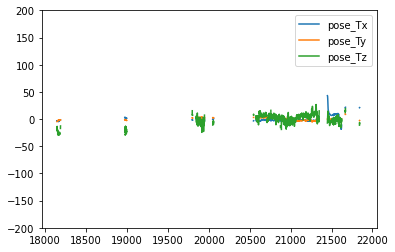

In [25]:
pd.options.mode.chained_assignment = None
df = data[(180*4 < data.timestamp) & (data.timestamp < 180*5)]
df.loc[df.confidence<0.8, :] = np.nan
cols = [col for col in df.columns if col.startswith('pose_T')]

print((df[cols] - df[cols].mean()).std())
(df[cols] - df[cols].mean()).plot.line(ylim=(-200,200))